In [32]:
import cv2
import os
from tkinter import ttk
os.environ['QT_QPA_PLATFORM'] = 'xcb'

from ultralytics import YOLO, solutions
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [8]:
model = YOLO("../data/models/best.pt")
cap = cv2.VideoCapture("../data/videos/test.mp4")

In [3]:
# Video writer
cap = cv2.VideoCapture("../data/videos/test.mp4")
region_points = [(400, 250), (450, 320), (1250, 280), (1000, 220)]

# Init Object Counter
counter = solutions.ObjectCounter(
    view_img=False,
    reg_pts=region_points,
    classes_names=model.names,
    draw_tracks=True,
    line_thickness=2,
)


Polygon Counter Initiated.


In [4]:
success, im0 = cap.read()
tracks = model.track(im0, persist=True, show=False)

im0 = counter.start_counting(im0, tracks)


0: 384x640 2 13_Buss, 2 11_Camioneta rurals, 1 5_Moto lineal, 1 14_Articulado, 1001.3ms
Speed: 4.1ms preprocess, 1001.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


In [6]:
co = 0
while cap.isOpened() and co<10:
    success, im0 = cap.read()
    if not success:
        print("Video frame is empty or video processing has been successfully completed.")
        break
    tracks = model.track(im0, persist=True, show=False)

    im0 = counter.start_counting(im0, tracks)
    co = co + 1


0: 384x640 2 13_Buss, 2 11_Camioneta rurals, 1 5_Moto lineal, 1 14_Articulado, 1081.9ms
Speed: 4.2ms preprocess, 1081.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 13_Buss, 2 11_Camioneta rurals, 1 5_Moto lineal, 1 14_Articulado, 991.3ms
Speed: 2.7ms preprocess, 991.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 13_Buss, 2 11_Camioneta rurals, 1 5_Moto lineal, 1 14_Articulado, 988.8ms
Speed: 2.2ms preprocess, 988.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 13_Buss, 2 11_Camioneta rurals, 1 5_Moto lineal, 1 14_Articulado, 1001.9ms
Speed: 2.0ms preprocess, 1001.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 13_Buss, 2 11_Camioneta rurals, 1 5_Moto lineal, 1 14_Articulado, 973.8ms
Speed: 2.1ms preprocess, 973.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 13_Buss, 2 11_Camioneta rurals, 1 5_Moto lineal, 1 1

In [7]:
print(dir(counter))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'annotator', 'class_wise_count', 'cls_txtdisplay_gap', 'count_bg_color', 'count_ids', 'count_txt_color', 'count_txt_thickness', 'counting_region', 'display_frames', 'draw_tracks', 'env_check', 'extract_and_process_tracks', 'fontsize', 'im0', 'in_counts', 'is_drawing', 'line_dist_thresh', 'mouse_event_for_region', 'names', 'out_counts', 'reg_pts', 'region_color', 'region_thickness', 'selected_point', 'start_counting', 'tf', 'track_color', 'track_history', 'track_thickness', 'view_img', 'view_in_counts', 'view_out_counts', 'window_name']


In [18]:
count = counter.class_wise_count
totals = {}
for i in count.keys():
    totals[i] = count[i]['IN'] + count[i]['OUT']

In [19]:
totals

{'13_Bus': 0, '14_Articulado': 0, '11_Camioneta rural': 0, '5_Moto lineal': 1}

: 

In [47]:
counter.track_history.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 0, 50])

In [11]:
counter.names

{0: '1_Auto Privado',
 1: '13_Bus',
 2: '11_Camioneta rural',
 3: '12_Microbus',
 4: '4_Mototaxi',
 5: '5_Moto lineal',
 6: '9_Omnibus Interprovincial',
 7: '10_Auto colectivo',
 8: '14_Articulado',
 9: '2_Cam. PickUp',
 10: '3_Taxi',
 11: '6_Bicicletas',
 12: '7_Scooter',
 13: '8_TransportenEscolar Personal',
 14: '15_TC_Ligeros',
 15: '16_TC Pesados',
 16: '17_TC SemiTrailler Trailer',
 17: '18_Triciclo',
 18: '19_Ambulancia'}

In [12]:
counter.reg_pts

[(400, 250), (450, 320), (1250, 280), (1000, 220)]

TypeError: Image data of dtype object cannot be converted to float

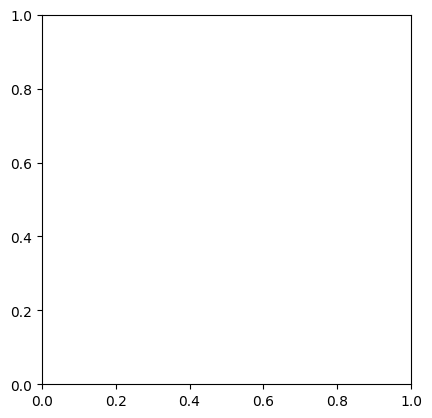

In [24]:
# Display the image using Matplotlib
plt.imshow(im0)
plt.title('Image with Polygon')
plt.axis('off')  # Hide axis
plt.show()